### I will start this task of Uber trips analysis by importing the necessary  Python libraries and dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the data from this CSV using the Pandas Data Frame
data = pd.read_csv("uber-raw-data-sep14.csv")

In [3]:
#print the first 5 rows of this dataset
data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [5]:
#To See the shape of this dataset
data.shape

(1028136, 4)

In [6]:
#To show how many null and nan values are contained in this dataset
data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [7]:
#To show how many duplicate values are contained in this dataset
data.duplicated().sum()

24037

In [9]:
#To remove all duplicate values from this dataset
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
data.shape

(1004099, 4)

In [12]:
#To get some basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004099 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1004099 non-null  object 
 1   Lat        1004099 non-null  float64
 2   Lon        1004099 non-null  float64
 3   Base       1004099 non-null  object 
dtypes: float64(2), object(2)
memory usage: 38.3+ MB


In [13]:
#As per the information about the date time column having an object class type first I need to convert it to a date time class
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004099 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1004099 non-null  datetime64[ns]
 1   Lat        1004099 non-null  float64       
 2   Lon        1004099 non-null  float64       
 3   Base       1004099 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 38.3+ MB


In [15]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


#### This data contains data about date and time, latitude and longitude, and a Base column that contains code affiliated with the Uber pickup. I want to prepare the data that I am using here to analyze the Uber trips according to the days and hours.

In [16]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)

In [17]:
data.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


#### So I have prepared this data according to the days and Hours, as I am using the Uber trips for the September month so let's have a look at each day to see on which day the Uber trips were highest:

C:\Users\Dell\AppData\Local\Temp\ipykernel_22828\1729605290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Day"])


<Axes: xlabel='Day', ylabel='Density'>

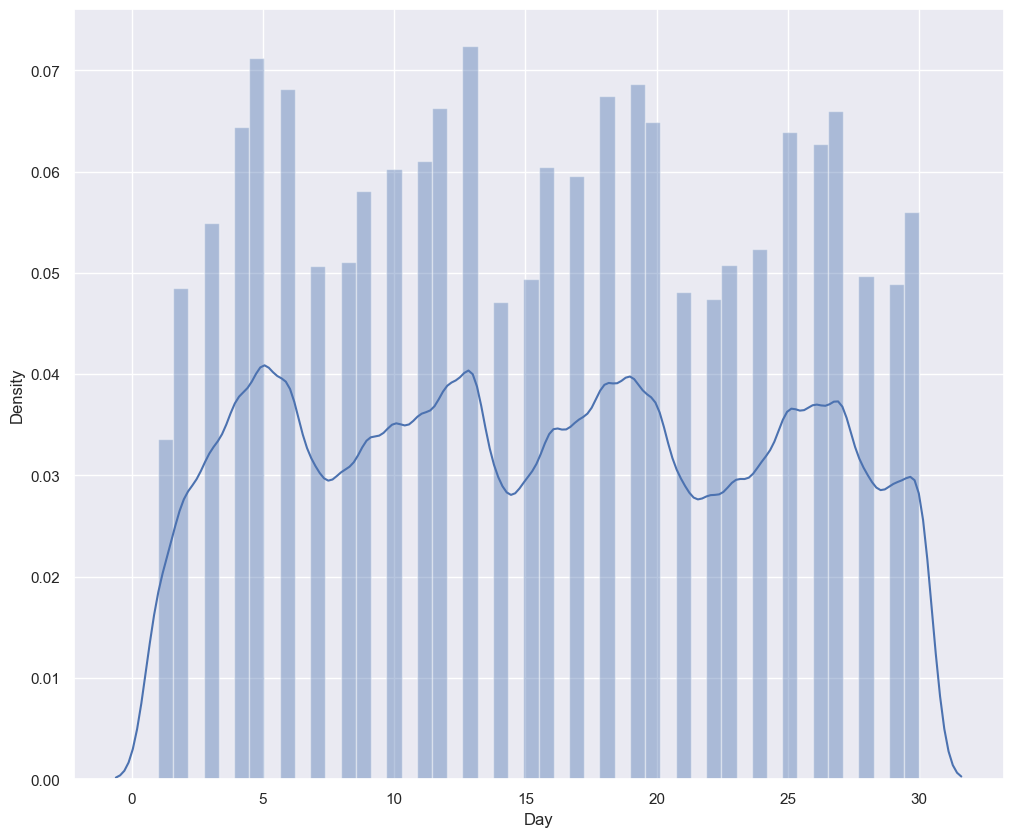

In [18]:
sns.set(rc={"figure.figsize": (12,10)})
sns.distplot(data["Day"])

#### By looking at the daily trips I can say that the Uber trips are rising on the working days and describes on the weekends. Now let's analyze the Uber trips according to the hours

C:\Users\Dell\AppData\Local\Temp\ipykernel_22828\96630979.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Hour"])


<Axes: xlabel='Hour', ylabel='Density'>

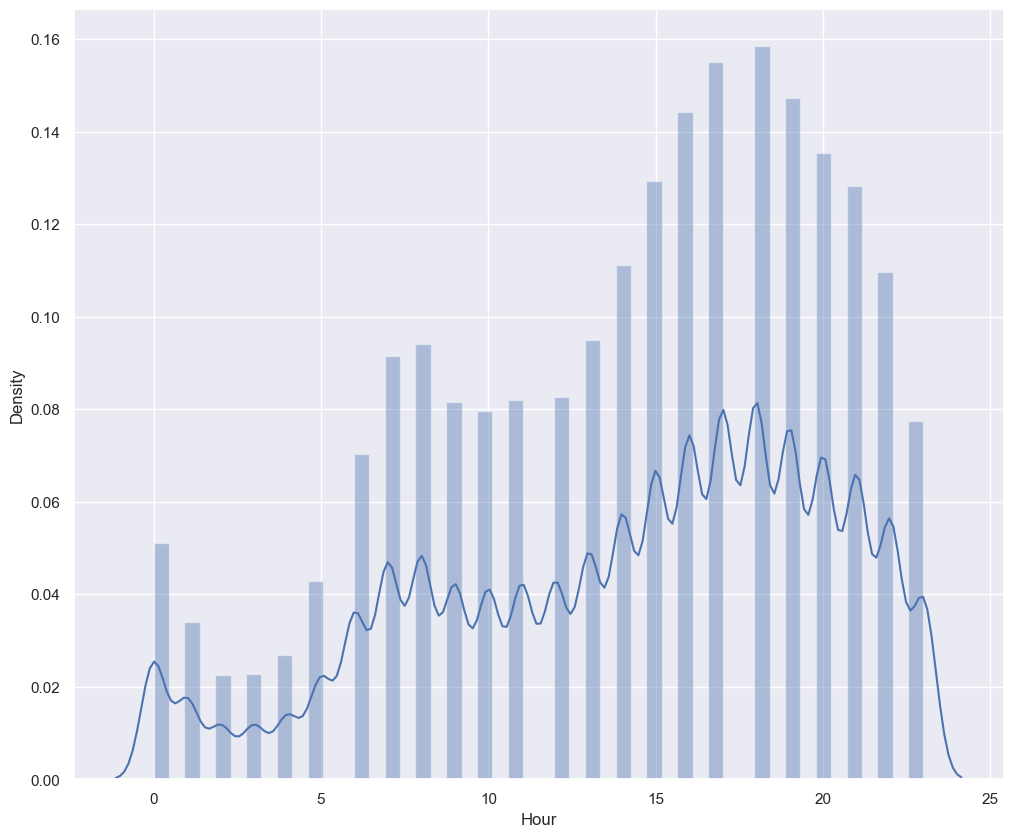

In [19]:
sns.distplot(data["Hour"])

#### According to the hourly data, The Uber trips decrease after midnight and the start increasing after 5 am and the trips keep rising till 6 pm such that 6 pm is the busiest hour  for Uber then the trips start decreasing. Now I want to analyze the Uber trips according to the weekdays:

C:\Users\Dell\AppData\Local\Temp\ipykernel_22828\2809950383.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Weekday"])


<Axes: xlabel='Weekday', ylabel='Density'>

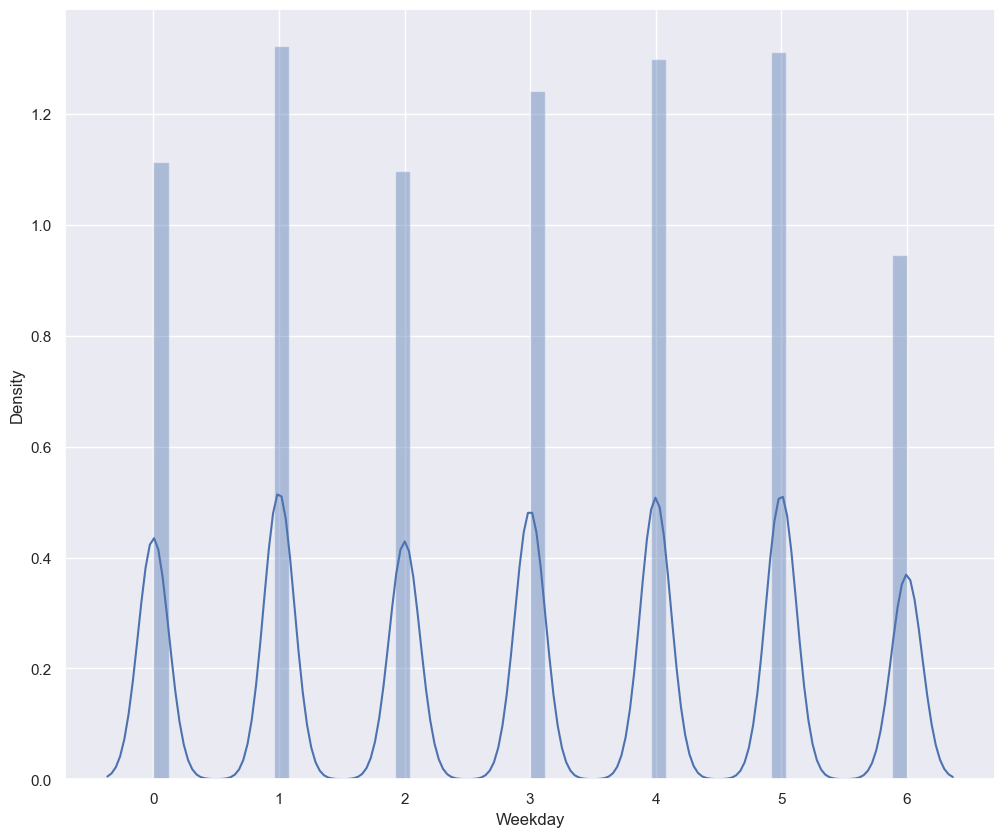

In [20]:
sns.distplot(data["Weekday"])

#### In the above figure 0 indicates Sunday, on Sundays the Uber trips and more than Saturdays so we can say people also use Uber for outings rather than for just going to work. On Saturdays, the Uber trips are the lowest and on Mondays, they are the highest. Now let’s have a look at the correlation of hours and weekdays on the Uber trips:

<Axes: xlabel='Hour', ylabel='Weekday'>

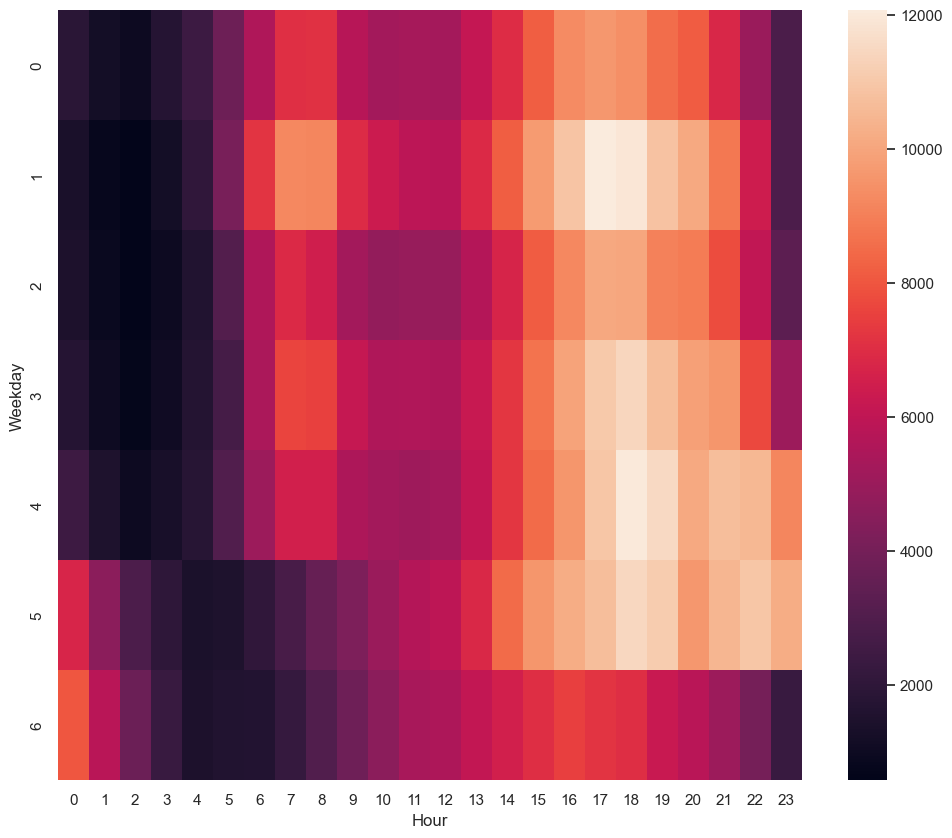

In [21]:
#Correlation of weekday and hour
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot = False)

In [22]:
data.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


### As I have the data about lonngitude and latitude so me can also plot the density of Uber trips according to the regions of the New Yourk city:

C:\ProgramData\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


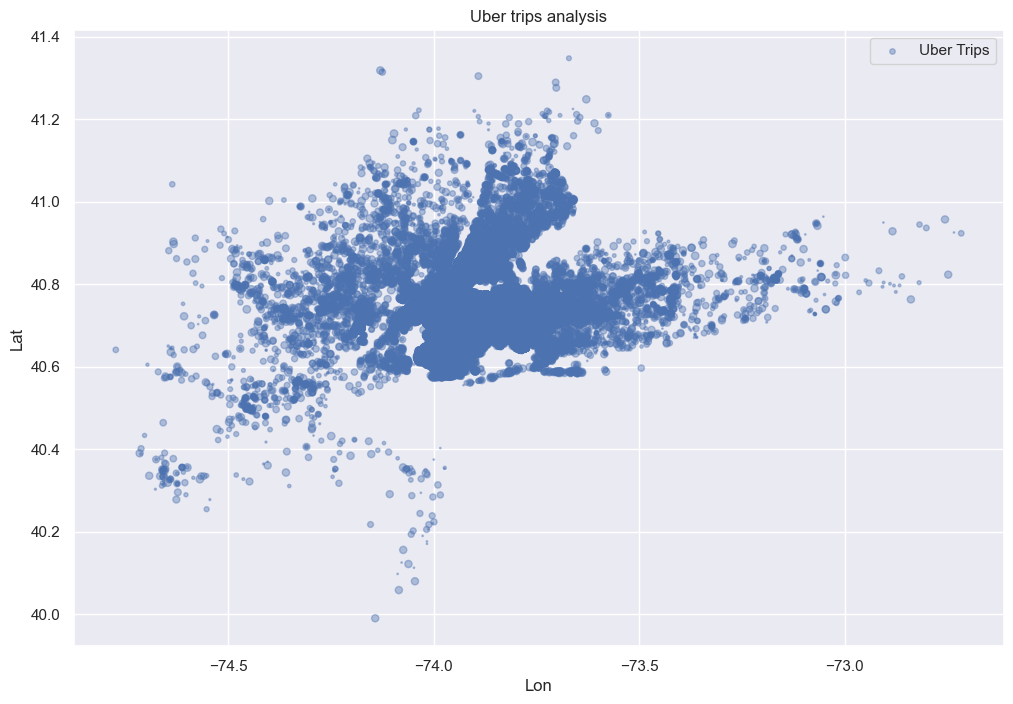

In [23]:
data.plot(kind = "scatter", x = "Lon", y = "Lat", alpha = 0.4, s = data["Day"], label = "Uber Trips",
         figsize=(12,8), cmap=plt.get_cmap("jet"))
plt.title("Uber trips analysis")
plt.legend()
plt.show()